In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from numpy import e

# Problema 1. Derivada por 5 puntos

In [10]:
adelante_5 = lambda f,x,h: (-25*f(x) +48*f(x+h) -36*f(x+ 2*h) +16*f(x+ 3*h) -3*f(x +4*h))/(12*h)
centrada_5 = lambda f,x,h: (f(x-2*h) -8*f(x-h) +8*f(x+h) -f(x+2*h))/(12*h)
atras_5 = lambda f,x,h: (25*f(x) -48*f(x+h) +36*f(x+ 2*h) -16*f(x+ 3*h) +3*f(x +4*h))/(12*h)

def five_point_derivative(f, xList, h):

    n = len(xList)
    df=[]

    for i in range(n):

        x = xList[i]

        if i == 0:
            df.append(adelante_5(f, x, h))
        elif i == n-1:
            df.append(atras_5(f, x, h))
        else:
            df.append(centrada_5(f, x, h))
    
    return(df)

,"dy, valor real: -0.3827",h,error
0,-0.3787,0.5000,0.0040
1,-0.3803,0.4456,0.0024
2,-0.3813,0.3911,0.0014
3,-0.3819,0.3367,0.0008
4,-0.3822,0.2822,0.0005
5,-0.3824,0.2278,0.0003
6,-0.3824,0.1733,0.0002
7,-0.3825,0.1189,0.0002
8,-0.3825,0.0644,0.0002
9,-0.3825,0.0100,0.0002


<Axes: xlabel='h'>

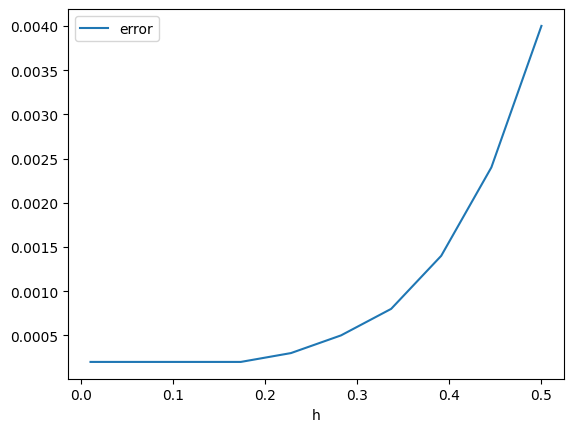

In [24]:
# a
# Funciones, f y derivadas de primer y segundo orden reales
f_P1 = lambda x: np.cos(x)
df_P1 = lambda x: -np.sin(x)
df2_P1 = lambda x: -np.sin(x)

# Rangos de x y f(x)
x_P1 = np.linspace(0, 2*np.pi, 10)
y_P1 = f_P1(x_P1)

# Derivadas exactas usando las funciones anteriores
x_punto = np.pi/8
dyReal_punto = df_P1(x_punto)
dy2Real_punto =df2_P1(x_punto)

# h en los que se va a evaluar la convergencia del metodo 
h_pruebas = np.linspace(0.01, 0.5, 10)[::-1]

# Listas preparadas para guardar un dataframe con el valor de h, el resultado y el error
error = []
valor = []

for h in h_pruebas:
    # Calcula la derivada de la lista de numeros con el h indicado, se interpola para hallar la derivada en el punto pi/8
    dy_punto_5Puntos = CubicSpline(x_P1, five_point_derivative(f_P1, x_P1, h), bc_type= 'natural')(x_punto)

    # Guarda los valores
    valor.append(np.round(dy_punto_5Puntos, 4))
    error.append(np.round(abs(dy_punto_5Puntos - dyReal_punto), 4))

# Prepar un diccionario para los valores de la derivada calculada, el h usado y el error presentado
h_errores = {f'dy, valor real: {round(dyReal_punto, 4)}': valor}
h_errores['h']= np.round(h_pruebas, 4)
h_errores['error'] = error

h_errores = pd.DataFrame(h_errores)
display(h_errores)

h_errores.plot(x= 'h', y= 'error')

In [12]:
# b
# Derivadas calculadas usando distintos h (0.1, 0.05, 0.01) y usando el metodo de 5 puntos
''' Como el metodo devuelve un arreglo de puntos segun los ingresados, en el que no se encuentra el punto pi/8 se interpolo el resultado
usando cubicspline para calcularla en el punto indicado'''
dy2_5puntod_P1_h1 = CubicSpline(x_P1, five_point_derivative(df_P1, x_P1, 0.1), bc_type= 'natural')(x_punto)
error_h1 = abs(dy2Real_punto - dy2_5puntod_P1_h1)

dy2_5puntod_P1_h2 = CubicSpline(x_P1, five_point_derivative(df_P1, x_P1, 0.05), bc_type= 'natural')(x_punto)
error_h2 = abs(dy2Real_punto - dy2_5puntod_P1_h2)

dy2_5puntod_P1_h3 = CubicSpline(x_P1, five_point_derivative(df_P1, x_P1, 0.01), bc_type= 'natural')(x_punto)
error_h3 = abs(dy2Real_punto - dy2_5puntod_P1_h2)

print(
    f'La sgunda derivada con un h = {0.05} fue de: {dy2_5puntod_P1_h2} con un error de: {error_h2}\n'
    f'Usando un h menor (h = {0.1}) fue de: {dy2_5puntod_P1_h1} con un error de: {error_h1}, un cambio de {error_h2 - error_h1} frente al de h=0.05\n'
    f'Usando un h mayor (h = {0.01}) fue de: {dy2_5puntod_P1_h3} con un error de: {error_h3}, un cambio de {error_h2 - error_h3} frente al de h=0.05'
    )

La sgunda derivada con un h = 0.05 fue de: -0.9020085967375638 con un error de: 0.5193251643724741
Usando un h menor (h = 0.1) fue de: -0.9020006557950043 con un error de: 0.5193172234299146, un cambio de 7.940942559514497e-06 frente al de h=0.05
Usando un h mayor (h = 0.01) fue de: -0.9020091305409332 con un error de: 0.5193251643724741, un cambio de 0.0 frente al de h=0.05


Segun parece el error no cambio si h disminuye, a diferencia de cuando aumenta

# Punto 2. derivadas

In [3]:
# Funciones para diferencias adelantadas, centrada y atrasada finitas
adelante = lambda f,x,h: (f(x+h) - f(x))/h
centrada = lambda f,x,h: (f(x+h) - f(x-h))/(2*h)
atras = lambda f,x,h: (f(x) - f(x-h))/h

#Segunda derivada
centrada2 = lambda f,x,h: (f(x+h) - 2*f(x) + f(x-h))/h**2

#Diferencias finitas
def finita(f, xList, h, orden= 1):
    ''' 
    Calcula la derivada de f usando diferencias finitas srgun el orden de la derivada 1 o 2, por defecto en en 1

    Entradas:

    f: funcion
    xList: lista de puntos en x
    h: distancia entre intervalos
    orden: orden de la derivada 1 o 2

    salida:

    df: lista de puntos de la derivada en los puntos x 
    '''
    n = len(xList)
    df=[]

    for i in range(n):

        x = xList[i]

        if orden == 1:
            if i == 0:
                df.append(adelante(f, x, h))
            elif i == n-1:
                df.append(atras(f, x, h))
            else:
                df.append(centrada(f, x, h))
        else:
            if i == 0 or i == n-1:
                df.append(None) 
            else:
                df.append(centrada2(f, x, h))
    return(df)

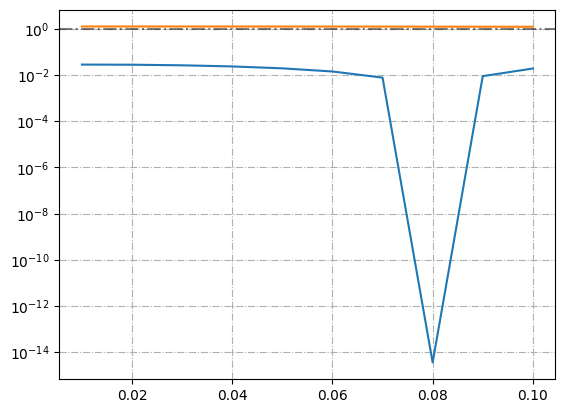

In [38]:
f_P2 = lambda x: x*np.exp(x)

x_P2 = np.linspace(1.8, 2.2, 6)
y_P2 = f_P2(x_P2)

x_evualue = 2.

# Calcula la derivada de orden 1 y orden 2 de la funcion
df1_P2_general = np.gradient(y_P2, x_P2)
df2_P2_general = np.gradient(df1_P2, x_P2)

# Calcula la derivada en el punto indicado 2.0
df1_P2_x2 = CubicSpline(x_P2, df1_P2_general, bc_type='natural')(x_evualue)
df2_P2_x2 = CubicSpline(x_P2, df2_P2_general, bc_type='natural')(x_evualue)

# Valores de h para iteral
h_values = np.linspace(0.01, 0.1, 10)

# listas para guardar los errores de la primera y segunda derivada
errores_df1 = np.zeros(len(h_values))
errores_df2 = np.zeros(len(h_values))

# contador para guardar los resultados
i = 0

for h in h_values:

    # Calcula la primera y segunda derivada
    df1_dif_finitas = finita(f_P2, x_P2, h)
    df2_dif_finitas = finita(f_P2, x_P2, h, orden= 2) 

    # Calcula la drrivada en el punto indicado
    df1_P2_x2_finitas = CubicSpline(x_P2, df1_dif_finitas, bc_type='natural')(x_evualue)
    df2_P2_x2_finitas = CubicSpline(x_P2[1:len(x_P2)-2], df2_dif_finitas[1:len(x_P2)-2], bc_type='natural')(x_evualue)

    # Guada el error respecto a la derivada del metodo np.graddient
    errores_df1[i] = abs(df1_P2_x2 - df1_P2_x2_finitas)
    errores_df2[i] = abs(df2_P2_x2 - df2_P2_x2_finitas)

    i += 1


plt.axhline(1, color= 'Black', linestyle= '-.', alpha= 0.5)

plt.semilogy(h_values, errores_df1)
plt.semilogy(h_values, errores_df2)

plt.grid(linestyle= '-.')

Se puede ver que el error para la primera derivada tiene orden cercano a -1, sin embargo hay un salto grande cuando h esta cerca a 0.08 donde el orden salta a -13

A parte se puede ver que la precision es muy mala para la segunda derivada